In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc


import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
raw_data = pd.read_excel("resources\Datathon_data-2025-Raw.xlsx")

print(raw_data.columns.values)

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\pikak\AppData\Local\Temp\ipykernel_53708\508721402.py:1: SyntaxWarning: invalid escape sequence '\D'
  raw_data = pd.read_excel("resources\Datathon_data-2025-Raw.xlsx")


['Country Name' 'Country Code' 'Time' 'Time Code'
 'Adjusted net national income (current US$) [NY.ADJ.NNTY.CD]'
 'Adjusted net national income per capita (current US$) [NY.ADJ.NNTY.PC.CD]'
 'Air transport, freight (million ton-km) [IS.AIR.GOOD.MT.K1]'
 'Air transport, registered carrier departures worldwide [IS.AIR.DPRT]'
 'Broad money (% of GDP) [FM.LBL.BMNY.GD.ZS]'
 'Broad money growth (annual %) [FM.LBL.BMNY.ZG]'
 'Bank capital to assets ratio (%) [FB.BNK.CAPA.ZS]'
 'Bank liquid reserves to bank assets ratio (%) [FD.RES.LIQU.AS.ZS]'
 'Bank nonperforming loans to total gross loans (%) [FB.AST.NPER.ZS]'
 'Central government debt, total (% of GDP) [GC.DOD.TOTL.GD.ZS]'
 'Adjusted net national income (annual % growth) [NY.ADJ.NNTY.KD.ZG]'
 'Children in employment, total (% of children ages 7-14) [SL.TLF.0714.ZS]'
 'Children out of school (% of primary school age) [SE.PRM.UNER.ZS]'
 'Children out of school, female (% of female primary school age) [SE.PRM.UNER.FE.ZS]'
 'Children out of sc

In [3]:
selected_raw_data = raw_data.drop(columns=['Country Name','Country Code', 'Time', 'Time Code'])

cleaned_data = selected_raw_data.replace("..", np.nan).apply(pd.to_numeric, errors='coerce')
print(len(cleaned_data))

cleaned_data.describe()


C:\Users\pikak\AppData\Local\Temp\ipykernel_53708\2669316101.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cleaned_data = selected_raw_data.replace("..", np.nan).apply(pd.to_numeric, errors='coerce')


3255


,Adjusted net national income (current US$) [NY.ADJ.NNTY.CD],Adjusted net national income per capita (current US$) [NY.ADJ.NNTY.PC.CD],"Air transport, freight (million ton-km) [IS.AIR.GOOD.MT.K1]","Air transport, registered carrier departures worldwide [IS.AIR.DPRT]",Broad money (% of GDP) [FM.LBL.BMNY.GD.ZS],Broad money growth (annual %) [FM.LBL.BMNY.ZG],Bank capital to assets ratio (%) [FB.BNK.CAPA.ZS],Bank liquid reserves to bank assets ratio (%) [FD.RES.LIQU.AS.ZS],Bank nonperforming loans to total gross loans (%) [FB.AST.NPER.ZS],"Central government debt, total (% of GDP) [GC.DOD.TOTL.GD.ZS]",...,"Short-term debt (% of exports of goods, services and primary income) [DT.DOD.DSTC.XP.ZS]",Income share held by fourth 20% [SI.DST.04TH.20],Income share held by highest 10% [SI.DST.10TH.10],Income share held by highest 20% [SI.DST.05TH.20],Income share held by lowest 10% [SI.DST.FRST.10],Income share held by lowest 20% [SI.DST.FRST.20],Income share held by second 20% [SI.DST.02ND.20],Income share held by third 20% [SI.DST.03RD.20],Adjusted savings: education expenditure (% of GNI) [NY.ADJ.AEDU.GN.ZS],Adjusted savings: education expenditure (current US$) [NY.ADJ.AEDU.CD]
count,2.299000e+03,2299.000000,1933.000000,2.031000e+03,2251.000000,2244.000000,1764.000000,2129.000000,1800.000000,908.000000,...,1631.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,2597.000000,2.449000e+03
mean,3.513186e+11,10739.568035,1296.234035,2.014360e+05,63.205683,12.359309,9.313612,24.927090,6.928161,60.656958,...,18.446957,22.082987,28.035822,43.352930,2.685728,6.935444,11.659735,15.971172,4.284641,1.661873e+10
std,1.426084e+12,14828.902355,4258.072322,8.210656e+05,48.081241,23.756766,5.287348,28.937897,8.015412,39.671899,...,19.847452,1.155282,5.507708,6.050551,0.873262,1.823794,1.946927,1.707702,2.471449,7.002536e+10
min,1.694327e+08,108.884410,0.000000,0.000000e+00,0.014517,-99.888243,-1.322527,0.204755,0.092335,1.845685,...,0.000000,15.700000,18.400000,32.600000,0.800000,2.400000,4.700000,8.000000,0.499852,8.535742e+06
25%,8.365480e+09,1433.041920,1.384000,7.648684e+03,33.856519,4.972290,6.923343,10.371487,2.174467,32.525535,...,4.307669,21.600000,24.000000,38.800000,2.000000,5.600000,10.400000,15.000000,2.838791,2.593582e+08
50%,3.060203e+10,4226.144704,22.206886,2.547800e+04,52.819588,9.407336,8.903706,18.591528,4.117839,51.147052,...,13.035262,22.300000,26.600000,41.800000,2.800000,7.150000,12.000000,16.400000,3.940700,1.159955e+09
75%,1.788599e+11,12429.619608,480.379190,1.232897e+05,77.654159,15.607286,11.164335,29.052673,8.865556,80.293919,...,25.809709,22.800000,30.875000,46.600000,3.300000,8.300000,13.100000,17.200000,5.150000,7.485187e+09
max,1.959300e+13,81275.574702,46004.645648,1.009903e+07,461.607361,708.928600,179.431226,390.110049,61.116041,249.411354,...,135.709123,25.500000,51.800000,68.900000,4.500000,10.500000,15.400000,19.100000,23.628830,1.046599e+12


144
2420


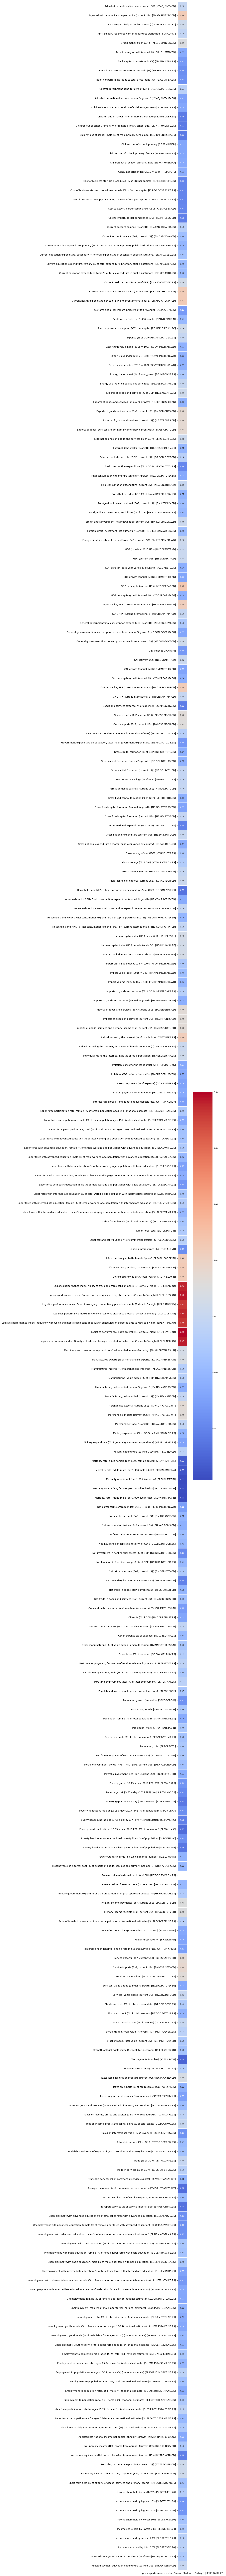

In [18]:
target = "Logistics performance index: Overall (1=low to 5=high) [LP.LPI.OVRL.XQ]"

print(cleaned_data.columns.get_loc(target))

possible_features = ['Air transport, freight (million ton-km) [IS.AIR.GOOD.MT.K1]', 
'Consumer price index (2010 = 100) [FP.CPI.TOTL]',
'Cost to export, border compliance (US$) [IC.EXP.CSBC.CD]',
'Cost to import, border compliance (US$) [IC.IMP.CSBC.CD]',
'Customs and other import duties (% of tax revenue) [GC.TAX.IMPT.ZS]',
'Electric power consumption (kWh per capita) [EG.USE.ELEC.KH.PC]',
'Export value index (2015 = 100) [TX.VAL.MRCH.XD.WD]',
'Export volume index (2015 = 100) [TX.QTY.MRCH.XD.WD]',
'Exports of goods and services (% of GDP) [NE.EXP.GNFS.ZS]',
'Manufactures exports (% of merchandise exports) [TX.VAL.MANF.ZS.UN]',
'Merchandise exports (current US$) [TX.VAL.MRCH.CD.WT]',
'Import value index (2015 = 100) [TM.VAL.MRCH.XD.WD]',
'Import volume index (2015 = 100) [TM.QTY.MRCH.XD.WD]',
'GDP (current US$) [NY.GDP.MKTP.CD]',
'GDP per capita (current US$) [NY.GDP.PCAP.CD]',
'GDP, PPP (current international $) [NY.GDP.MKTP.PP.CD]',
'Goods exports (BoP, current US$) [BX.GSR.MRCH.CD]',
'Gross domestic savings (% of GDP) [NY.GDS.TOTL.ZS]',
'Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]',
'Labor force participation rate, total (% of total population ages 15+) (national estimate) [SL.TLF.CACT.NE.ZS]',
'Labor force with advanced education (% of total working-age population with advanced education) [SL.TLF.ADVN.ZS]',
'Labor force with intermediate education (% of total working-age population with intermediate education) [SL.TLF.INTM.ZS]',
'Labor force with basic education (% of total working-age population with basic education) [SL.TLF.BASC.ZS]',
'Logistics performance index: Overall (1=low to 5=high) [LP.LPI.OVRL.XQ]',
'Real interest rate (%) [FR.INR.RINR]',
'Risk premium on lending (lending rate minus treasury bill rate, %) [FR.INR.RISK]',
'Taxes on exports (% of tax revenue) [GC.TAX.EXPT.ZS]',
'Taxes on goods and services (% of revenue) [GC.TAX.GSRV.RV.ZS]',
'Taxes on income, profits and capital gains (% of revenue) [GC.TAX.YPKG.RV.ZS]']

cleaned_data = cleaned_data[cleaned_data.isnull().mean(axis=1) <= 0.5]

print(len(cleaned_data))

cleaned_data = cleaned_data.fillna(cleaned_data.mean())

correlations = cleaned_data.corr()

plt.figure(figsize=(10, 200))


heat_map = sns.heatmap(correlations.loc[:,[target]],
                        cmap="coolwarm",          # Use a visually appealing colormap
                        cbar=True,
                        annot=True,
                        square=True,
                        fmt='.2f',
                        annot_kws={'size': 7.5},
                        cbar_kws={"shrink": 0.8},
                        linewidths=0.5
                       )
plt.show()